In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df_merged_all=pd.read_csv('/content/drive/MyDrive/SV_Callers/DFiltered/df_merged_all.csv')
df_merged_all.head(5)

,Unnamed: 0,tool,threshold,strain,len,nTP,nFP,nTN,n_true,nFN,sensitivity,precision,specificity,f-score
0,0,grom,10,human,50-100,427,28,427,1360,933.0,0.313971,0.938462,0.938462,0.470523
1,1,grom,10,human,50-100,427,28,427,1360,933.0,0.313971,0.938462,0.938462,0.470523
2,2,grom,10,human,50-100,427,28,427,1360,933.0,0.313971,0.938462,0.938462,0.470523
3,3,grom,10,human,50-100,427,28,427,1360,933.0,0.313971,0.938462,0.938462,0.470523
4,4,grom,10,human,50-100,427,28,427,1360,933.0,0.313971,0.938462,0.938462,0.470523


In [ ]:
threshold_100=df_merged_all[(df_merged_all['threshold'] ==100)]
threshold_100[threshold_100['tool']=='octopus'].describe()

,Unnamed: 0,threshold,nTP,nFP,nTN,n_true,nFN,sensitivity,precision,specificity,f-score
count,4801.000000,4801.0,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,75139.000000,100.0,1036.969381,274.571339,1085.431785,1689.574464,652.605082,0.636834,0.790931,0.798580,0.697866
std,1386.073651,0.0,32.206536,22.907376,39.427533,338.099212,323.630248,0.120037,0.016041,0.010768,0.070368
min,72739.000000,100.0,2.000000,0.000000,2.000000,203.000000,201.000000,0.009852,0.776097,0.789474,0.019512
25%,73939.000000,100.0,1026.000000,253.000000,1062.000000,1360.000000,334.000000,0.516987,0.776097,0.789474,0.629874
50%,75139.000000,100.0,1026.000000,296.000000,1110.000000,1360.000000,334.000000,0.754412,0.776097,0.789474,0.765101
75%,76339.000000,100.0,1050.000000,296.000000,1110.000000,2031.000000,981.000000,0.754412,0.805833,0.807605,0.765101
max,77539.000000,100.0,1050.000000,296.000000,1110.000000,2031.000000,981.000000,0.754412,1.000000,1.000000,0.765101


In [ ]:
df_cat=pd.read_csv("/content/drive/MyDrive/SV_Callers/DFiltered/df_cat.csv")

### Figure 5a

In [ ]:
print(threshold_100)

         Unnamed: 0    tool  threshold  ... precision specificity   f-score
2326           2326    grom        100  ...  0.947253    0.947598  0.474931
2327           2327    grom        100  ...  0.947253    0.947598  0.474931
2328           2328    grom        100  ...  0.947253    0.947598  0.474931
2329           2329    grom        100  ...  0.947253    0.947598  0.474931
2330           2330    grom        100  ...  0.947253    0.947598  0.474931
...             ...     ...        ...  ...       ...         ...       ...
7539958     7539958  smoove        100  ...  0.804000    0.830450  0.518041
7539959     7539959  smoove        100  ...  0.804000    0.830450  0.518041
7539960     7539960  smoove        100  ...  0.804000    0.830450  0.518041
7539961     7539961  smoove        100  ...  0.804000    0.830450  0.518041
7539962     7539962  smoove        100  ...  0.804000    0.830450  0.518041

[1695956 rows x 14 columns]


In [ ]:
dfx = threshold_100[threshold_100['len']=='50-100']
dfx[dfx['tool']=='smoove']

,Unnamed: 0,tool,threshold,strain,len,nTP,nFP,nTN,n_true,nFN,sensitivity,precision,specificity,f-score


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


FileNotFoundError: ignored

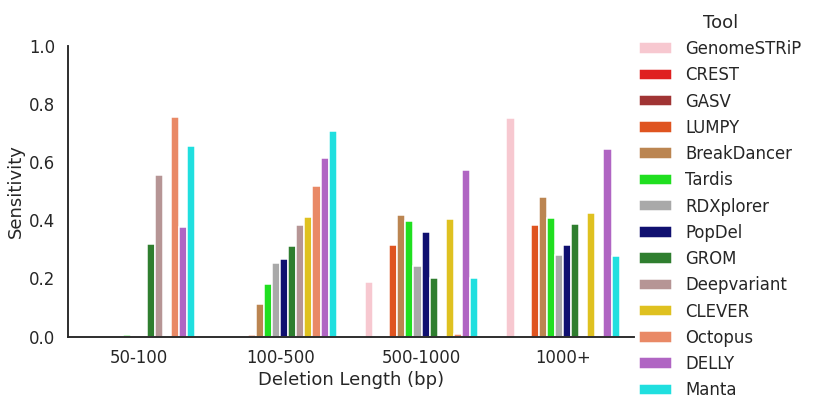

In [ ]:
import numpy as np


fig4b=sns.set_style('white')
fig4b=sns.set_context('talk')

color_map = {
             'BREAKDANCER':'peru', 
             'clever':'gold', 
             'grom':'forestgreen', 
             'DELLY':'mediumorchid', 
             'gasv':'firebrick', 
             'tardis':'lime',
             'popdel':'navy', 
             'rdxplorer':'darkgray', 
             'smoove':'orangered',  
             'crest':'red', 
             'GENOMESTRIP':'pink',
             'manta':'aqua',
            'deepvariant':'rosybrown',
            'octopus':'coral'}

fig_order = ['GENOMESTRIP','crest','gasv','smoove','BREAKDANCER','tardis','rdxplorer','popdel','grom','deepvariant','clever'
              ,'octopus','DELLY','manta']
             
labels    = ['GenomeSTRiP','CREST','GASV','LUMPY','BreakDancer','Tardis','RDXplorer','PopDel','GROM','Deepvariant','CLEVER',
             'Octopus','DELLY','Manta']

threshold_100["Tool"] = threshold_100["tool"].map(dict(zip(fig_order, labels)))

pal = []
for tool in fig_order:
        pal.append(color_map[tool])

fig4b = sns.catplot(x='len', y='sensitivity',data=threshold_100,hue='Tool',errwidth=2.5,aspect=1.8,kind='bar',palette=pal,hue_order=labels)
fig4b.set_xticklabels(rotation=0)
fig4b.set(ylim=(0, 1))
# plt.yticks(np.arange(0, 0.02, 0.00125))
fig4b.set(xlabel='Deletion Length (bp)', ylabel='Sensitivity')

fig4b=sns.despine()
#plt.show(fig4b)
# plt.yscale('symlog', linthreshy=0.001)

plt.savefig("/content/gdrive/MyDrive/SV_Callers/Figures_all/fig5a", bbox_inches='tight')
plt.savefig("/content/gdrive/MyDrive/SV_Callers/Figures_all/fig5a.pdf",bbox_inches="tight")

In [ ]:
test=threshold_100.loc[threshold_100['len']=='1000+']
fig_order = ['grom','BREAKDANCER','DELLY','GENOMESTRIP','manta','octopus','popdel','clever',
       'gasv','rdxplorer','deepvariant','tardis','crest','smoove']
# labels    = ['GROM','BREAKDANCER','DELLY','GENOMESTRIP','MANTA','OCTOPUS','POPDEL','LUMPY','CLEVER',
#        'GASV','PINDEL']
for tool in fig_order:
    print(tool, test.loc[test['tool'] == tool,'sensitivity'].mean())

grom 0.38593155893536224
BREAKDANCER 0.47908745247148826
DELLY 0.6444866920152176
GENOMESTRIP 0.752851711026628
manta 0.27756653992395314
octopus nan
popdel 0.31558935361216306
clever 0.4239543726235895
gasv 0.0
rdxplorer 0.2794676806083766
deepvariant nan
tardis 0.40684410646387337
crest 0.0
smoove 0.3821292775665409


## Figure 5b

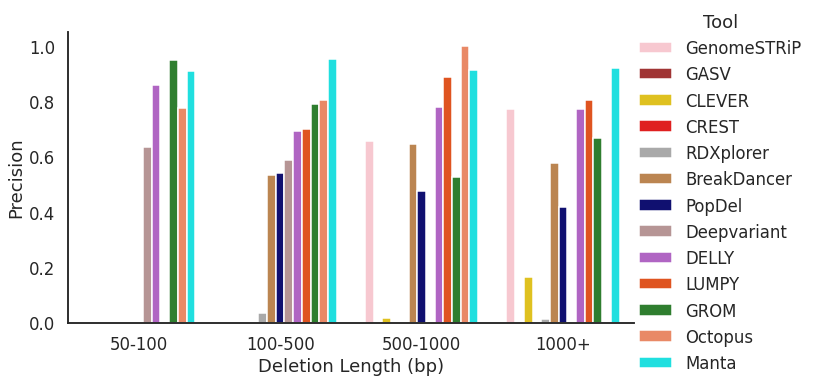

In [ ]:
fig4c=sns.set_style('white')
fig4c=sns.set_context('talk')

fig_order = ['GENOMESTRIP','gasv','clever','crest','rdxplorer','BREAKDANCER','popdel','deepvariant','DELLY','smoove',
             'grom','octopus','manta']
labels    = ['GenomeSTRiP','GASV','CLEVER','CREST','RDXplorer','BreakDancer','PopDel','Deepvariant','DELLY','LUMPY',
             'GROM','Octopus','Manta']

pal = []
for tool in fig_order:
        pal.append(color_map[tool])

fig4c = sns.catplot(x="len", y="precision",data=threshold_100,hue='Tool',errwidth=2.5,aspect=1.8,kind='bar',palette=pal,hue_order=labels)
fig4c.set_xticklabels(rotation=0)
fig4c.set(xlabel='Deletion Length (bp)', ylabel='Precision')
fig4c=sns.despine()
#plt.show(fig4c)
# plt.yscale('symlog', linthreshy=0.001)

plt.savefig("/content/gdrive/MyDrive/SV_Callers/Figures_all/fig5b", bbox_inches='tight')
plt.savefig("/content/gdrive/MyDrive/SV_Callers/Figures_all/fig5b.pdf",bbox_inches="tight")

In [ ]:
test=threshold_100.loc[threshold_100['len']=='50-100']
fig_order = ['grom','BREAKDANCER','DELLY','GENOMESTRIP','manta','octopus','popdel','clever',
       'gasv','rdxplorer','deepvariant','tardis','crest','smoove']
# labels    = ['GROM','BREAKDANCER','DELLY','GENOMESTRIP','MANTA','OCTOPUS','POPDEL','LUMPY','CLEVER',
#        'GASV','PINDEL']
for tool in fig_order:
    print(tool, test.loc[test['tool'] == tool,'precision'].mean())

grom 0.9472527472527277
BREAKDANCER nan
DELLY 0.8580968280467615
GENOMESTRIP nan
manta 0.9102956167176272
octopus 0.7760968229954447
popdel nan
clever nan
gasv 0.0
rdxplorer nan
deepvariant 0.6347607052896546
tardis 1.0
crest nan
smoove nan


## Figure 5c

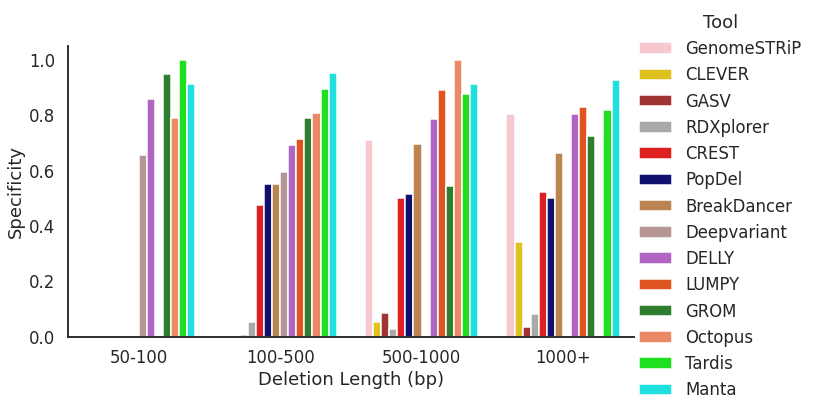

In [ ]:
#all other figures arranged by 100 bp threshold or 100-500 bp deletion length except for this figure 
#tools arranged by 500-100bp

fig4e=sns.set_style("white")
fig4e=sns.set_context("talk")

fig_order = ['GENOMESTRIP','clever','gasv','rdxplorer','crest','popdel','BREAKDANCER','deepvariant','DELLY','smoove',
             'grom','octopus','tardis','manta']
labels    = ['GenomeSTRiP','CLEVER','GASV','RDXplorer','CREST','PopDel','BreakDancer','Deepvariant','DELLY','LUMPY',
             'GROM','Octopus','Tardis','Manta']

pal = []
for tool in fig_order:
        pal.append(color_map[tool])
# fig4c = sns.catplot(x="len", y="precision",data=threshold_100,hue='Tool',errwidth=2.5,aspect=1.8,kind='bar',palette=pal,hue_order=labels)
fig4e = sns.catplot(x="len", y="specificity",data=threshold_100,hue='Tool',aspect=1.8,kind='bar',errwidth=2.5,hue_order=labels, palette=pal)
fig4e.set_xticklabels(rotation=0)
fig4e.set(xlabel='Deletion Length (bp)', ylabel='Specificity')
fig4e=sns.despine()
# plt.yscale('symlog',linthreshy=0.001)
#plt.show(g)
plt.savefig("/content/gdrive/MyDrive/SV_Callers/Figures_all/fig5c", bbox_inches='tight')
plt.savefig("/content/gdrive/MyDrive/SV_Callers/Figures_all/fig5c.pdf",bbox_inches="tight")



## Figure 5d

In [ ]:
test=threshold_100.loc[threshold_100['len']=='50-100']
fig_order = ['grom','BREAKDANCER','DELLY','GENOMESTRIP','manta','octopus','popdel','clever',
       'gasv','rdxplorer','deepvariant','tardis','crest','smoove']
# labels    = ['GROM','BREAKDANCER','DELLY','GENOMESTRIP','MANTA','OCTOPUS','POPDEL','LUMPY','CLEVER',
#        'GASV','PINDEL']
for tool in fig_order:
    print(tool, test.loc[test['tool'] == tool,'f-score'].sum())

grom 422.21377076481906
BREAKDANCER 0.0
DELLY 586.1541555436586
GENOMESTRIP 0.0
manta 1436.5817934802133
octopus 1860.7248200572067
popdel 0.0
clever 0.0
gasv 0.0
rdxplorer 0.0
deepvariant 1197.8643568542846
tardis 0.10541727567080897
crest 0.0
smoove 0.0


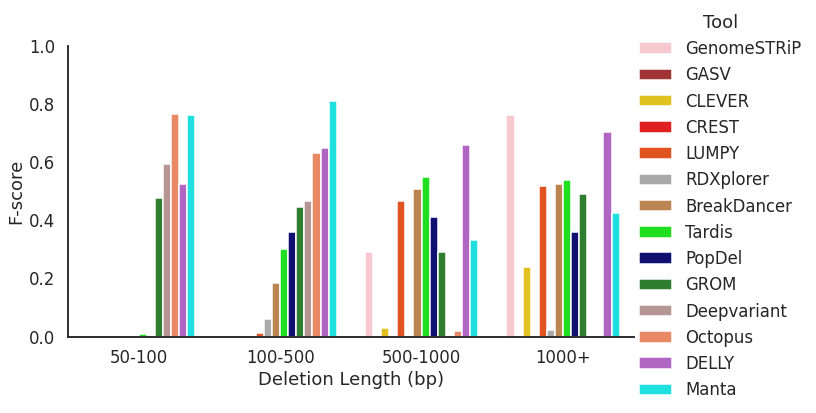

In [ ]:
fig4d=sns.set_style("white")
fig4d=sns.set_context("talk")

fig_order = ['GENOMESTRIP','gasv','clever','crest','smoove','rdxplorer','BREAKDANCER','tardis','popdel','grom','deepvariant',
             'octopus','DELLY','manta']
labels    = ['GenomeSTRiP','GASV','CLEVER','CREST','LUMPY','RDXplorer','BreakDancer','Tardis','PopDel','GROM','Deepvariant',
             'Octopus','DELLY','Manta']

pal = []
for tool in fig_order:
    pal.append(color_map[tool])

fig4d = sns.catplot(x="len", y="f-score",data=threshold_100,hue='Tool',aspect=1.8,kind='bar',errwidth=2.5,palette=pal,hue_order=labels)
fig4d.set_xticklabels(rotation=0)
fig4d.set(ylim=(0, 1))
# plt.yticks(np.arange(0, 0.05, 0.005))
fig4d.set(xlabel='Deletion Length (bp)', ylabel='F-score')
fig4d=sns.despine()
# plt.yscale('symlog',linthreshy=0.001)

#plt.show(fig4d)

plt.savefig("/content/gdrive/MyDrive/SV_Callers/Figures_all/fig5d", bbox_inches='tight')
plt.savefig("/content/gdrive/MyDrive/SV_Callers/Figures_all/fig5d.pdf",bbox_inches="tight")

###Figure 5e

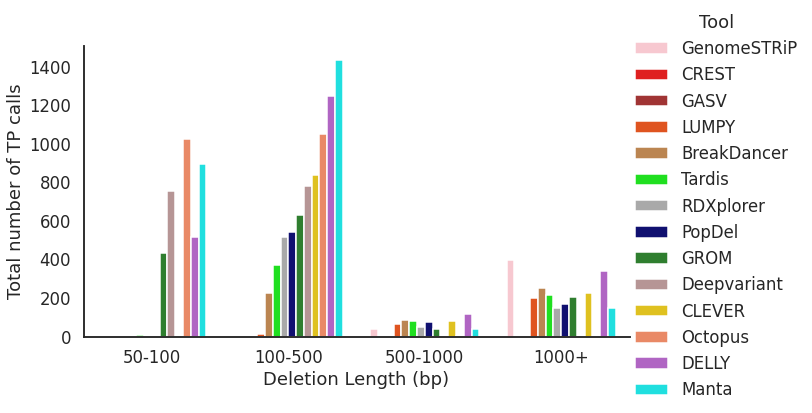

In [ ]:
fig4d=sns.set_style("white")
fig4d=sns.set_context("talk")

fig_order = ['GENOMESTRIP','crest','gasv','smoove','BREAKDANCER','tardis','rdxplorer','popdel','grom','deepvariant','clever',
             'octopus','DELLY','manta']

labels    = ['GenomeSTRiP','CREST','GASV','LUMPY','BreakDancer','Tardis','RDXplorer','PopDel','GROM','Deepvariant','CLEVER',
             'Octopus','DELLY','Manta']

pal = []
for tool in fig_order:
    pal.append(color_map[tool])

fig4d = sns.catplot(x="len", y="nTP",data=threshold_100,hue='Tool',aspect=1.8,kind='bar',errwidth=2.5,palette=pal,hue_order=labels)
fig4d.set_xticklabels(rotation=0)
# fig4d.set(ylim=(0, 1000))
# plt.yticks(np.arange(0, 0.05, 0.005))
fig4d.set(xlabel='Deletion Length (bp)', ylabel='Total number of TP calls')
fig4d=sns.despine()
# plt.yscale('symlog',linthreshy=0.001)

#plt.show(fig4d)

plt.savefig("/content/gdrive/MyDrive/SV_Callers/Figures_all/fig5e", bbox_inches='tight')
plt.savefig("/content/gdrive/MyDrive/SV_Callers/Figures_all/fig5e.pdf",bbox_inches="tight")

In [ ]:
dftemp=threshold_100[threshold_100['len']=='1000+']
# ['grom', 'BREAKDANCER', 'DELLY', 'GENOMESTRIP', 'manta', 'octopus',
#        'popdel', 'clever', 'gasv', 'rdxplorer', 'tardis', 'crest',
#        'smoove']
# print(dftemp.drop_duplicates(subset ="tool",keep = False, inplace = True))


In [ ]:
dftemp.drop_duplicates(subset ="tool",keep = 'first', inplace = True)
dftemp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,tool,threshold,strain,len,nTP,nFP,nTN,n_true,nFN,sensitivity,precision,specificity,f-score
4770,4770,grom,100,human,1000+,203,101,266,526,323.0,0.385932,0.667763,0.724796,0.489157
14871,14871,BREAKDANCER,100,human,1000+,252,185,364,526,274.0,0.479087,0.576659,0.663024,0.523364
28232,28232,DELLY,100,human,1000+,339,100,411,526,187.0,0.644487,0.772210,0.804305,0.702591
42489,42489,GENOMESTRIP,100,human,1000+,396,117,485,526,130.0,0.752852,0.771930,0.805648,0.762271
56010,56010,manta,100,human,1000+,146,13,167,526,380.0,0.277567,0.918239,0.927778,0.426277
92238,92238,popdel,100,human,1000+,166,230,231,526,360.0,0.315589,0.419192,0.501085,0.360087
2843877,2843877,clever,100,human,1000+,223,1129,588,526,303.0,0.423954,0.164941,0.342458,0.237487
6490092,6490092,gasv,100,human,1000+,0,184328,6521,526,526.0,0.000000,0.000000,0.034168,0.000000
7319192,7319192,rdxplorer,100,human,1000+,147,12055,1051,526,379.0,0.279468,0.012047,0.080192,0.023099
7499123,7499123,tardis,100,human,1000+,214,55,250,526,312.0,0.406844,0.795539,0.819672,0.538365


In [ ]:
dftemp.to_csv("temp3.csv")

###Figure 5f

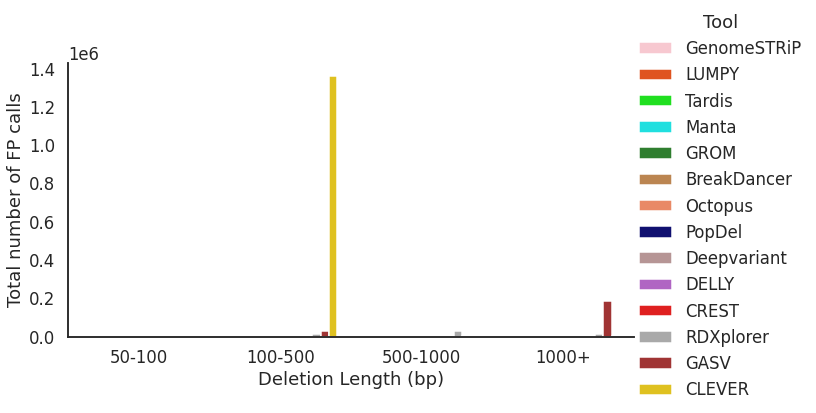

In [ ]:
fig4d=sns.set_style("white")
fig4d=sns.set_context("talk")

fig_order = ['GENOMESTRIP','smoove','tardis','manta','grom','BREAKDANCER','octopus','popdel','deepvariant','DELLY',
             'crest','rdxplorer','gasv','clever']

labels    = ['GenomeSTRiP','LUMPY','Tardis','Manta','GROM','BreakDancer','Octopus','PopDel','Deepvariant','DELLY','CREST',
             'RDXplorer','GASV','CLEVER']

pal = []
for tool in fig_order:
    pal.append(color_map[tool])

fig4d = sns.catplot(x="len", y="nFP",data=threshold_100,hue='Tool',aspect=1.8,kind='bar',errwidth=2.5,palette=pal,hue_order=labels)
fig4d.set_xticklabels(rotation=0)
# fig4d.set(ylim=(0, 1000))
# plt.yticks(np.arange(0, 0.05, 0.005))
# plt.yscale('log')
fig4d.set(xlabel='Deletion Length (bp)', ylabel='Total number of FP calls')
fig4d=sns.despine()
# plt.yscale('symlog',linthreshy=0.001)
#plt.show(fig4d)

plt.savefig("/content/gdrive/MyDrive/SV_Callers/Figures_all/fig5f", bbox_inches='tight')
plt.savefig("/content/gdrive/MyDrive/SV_Callers/Figures_all/fig5f.pdf",bbox_inches="tight")